<a href="https://colab.research.google.com/github/cwjng/si671-final-project/blob/main/ad_correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [22]:
df = pd.read_csv("si671-final-project/Ecommerce_Consumer_Behavior_Analysis_Data.csv")
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


# Preprocessing
*   Remove $ from `Purchase_Amount` values to turn into a numeric column
*   Create ordinal encoding for `Social_Media_Influence` and `Engagement_with_Ads` since these columns follow a natural order (*None/Low/Medium/High*)

In [23]:
# Remove $ unit
df['Purchase_Amount'] = df['Purchase_Amount'].replace({r'[$,]': ''}, regex=True).astype(float)

# Create ordinal encoding
df['Social_Media_Influence'] = df['Social_Media_Influence'].fillna("None")
df['Engagement_with_Ads'] = df['Engagement_with_Ads'].fillna("None")

engagement_mapping = {'None': -1, 'Low': 0,'High': 2}
df['Engagement_with_Ads_Encoded'] = df['Engagement_with_Ads'].map(engagement_mapping)

social_media_mapping = {'None': -1, 'Low': 0, 'Medium': 1, 'High': 2}
df["Social_Media_Influence_Encoded"] = df["Social_Media_Influence"].map(social_media_mapping)

In [24]:
# Specify numeric/categorical columns to use while exploring different correlation analyses
ad_features_numeric = [
    'Time_Spent_on_Product_Research(hours)',
    'Engagement_with_Ads_Encoded',
    'Social_Media_Influence_Encoded'
]

purchase_features_numeric = [
    'Purchase_Amount',
    'Frequency_of_Purchase',
    'Time_to_Decision'
]

ad_features_categorical = ['Engagement_with_Ads', 'Social_Media_Influence']
purchase_features_categorical = ['Purchase_Category', 'Purchase_Channel',
                                 'Payment_Method', 'Purchase_Intent']

# Pearson Correlation Analysis

## Correlation Matrix
Computing correlations (linear relationships) between
*   Encoded/numeric ad engagement columns: `Engagement_with_Ads_Encoded`, `Social_Media_Influence_Encoded`, `Time_Spend_on_Product_Research(hours)`
*   Numeric purchase-related columns: `Purchase_Amount`, `Frequency_of_Purchase`, `Time_to_Decision`


In [25]:
pearson_df = df[ad_features_numeric + purchase_features_numeric].corr(method='pearson')

print("Pearson Correlation Matrix")
pearson_df


Pearson Correlation Matrix


,Time_Spent_on_Product_Research(hours),Engagement_with_Ads_Encoded,Social_Media_Influence_Encoded,Purchase_Amount,Frequency_of_Purchase,Time_to_Decision
Time_Spent_on_Product_Research(hours),1.000000,0.019747,-0.054919,-0.019524,0.009575,-0.008795
Engagement_with_Ads_Encoded,0.019747,1.000000,-0.017740,0.020787,0.042620,0.021678
Social_Media_Influence_Encoded,-0.054919,-0.017740,1.000000,0.061699,-0.016617,-0.029626
Purchase_Amount,-0.019524,0.020787,0.061699,1.000000,0.000930,0.014690
Frequency_of_Purchase,0.009575,0.042620,-0.016617,0.000930,1.000000,0.034838
Time_to_Decision,-0.008795,0.021678,-0.029626,0.014690,0.034838,1.000000


## Heatmap

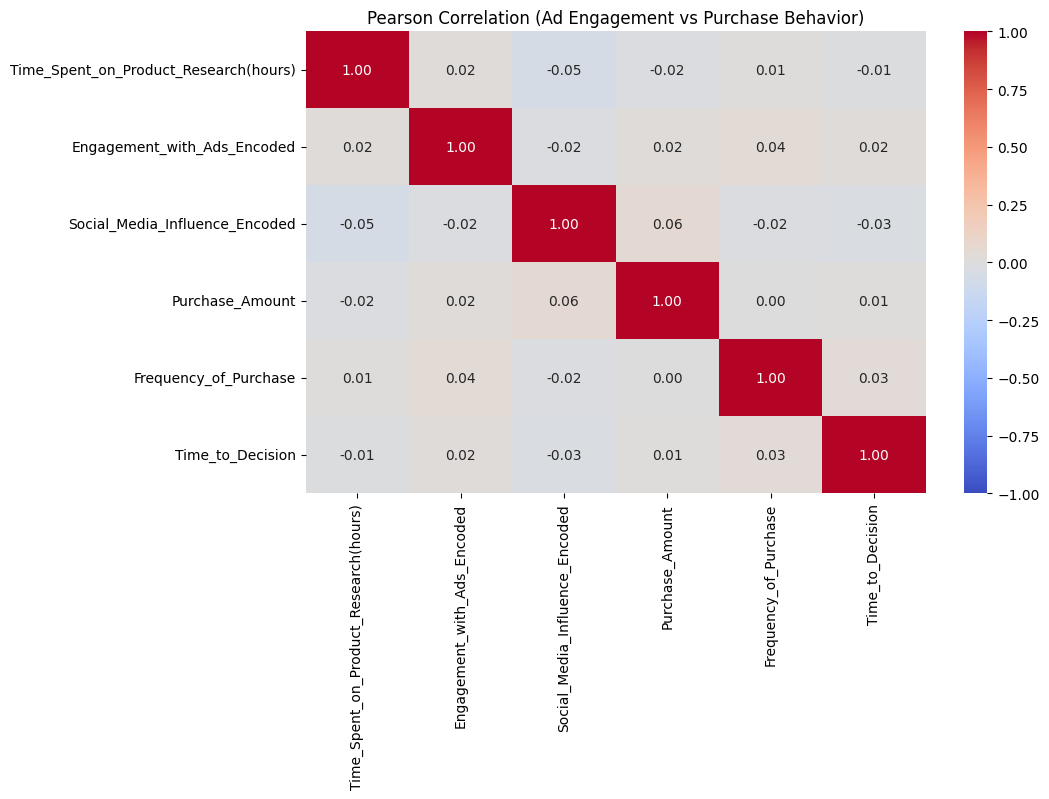

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_df, annot=True, cmap="coolwarm", center=0, fmt=".2f", vmin=-1, vmax=1)
plt.title("Pearson Correlation (Ad Engagement vs Purchase Behavior)")
plt.show()

## Interpretation of Pearson Correlation Analysis

The Pearson correlation heatmap visually represents the linear relationships between the selected numerical features related to ad engagement and purchase behavior.

The ad engagement columns: `Engagement_with_Ads_Encoded` and `Social_Media_Influence_Encoded` were encoded based on the ordinal ranking of the categorical variables and analyzed with numerical purchase-related columns.

### Insights
*   **Engagement with Ads (Encoded) and Purchase Behavior**
    *   `Engagement_with_Ads_Encoded` shows extremely small correlations with `Purchase_Amount` (0.02), `Frequency_of_Purchase` (0.04), and `Time_to_Decision` (0.02).
    *   These values indicate effectively no linear relationship between ad engagement levels and purchase behaviors since they're all close to 0.
*   **Social Media Influence (Encoded) and Purchase Behavior**
    *   `Social_Media_Influence_Encoded` shows very small correlations with `Purchase_Amount` (0.06), `Frequency_of_Purchase` (–0.02), and `Time_to_Decision` (–0.03).
    *   These correlation coefficients suggest negligible linear associations since they're all close to 0.
*   **Time Spent on Product_Research and Purchase Behavior and Purchase Behavior**
    *   `Time_Spent_on_Product_Research(hours)` shows very small correlations with `Purchase_Amount` (-0.02), `Frequency_of_Purchase` (0.01), and `Time_to_Decision` (-0.01).
    *   These correlation coefficients suggest negligible linear associations since they're all close to 0.
*   **General Observations**
    *   All correlations fall between –0.05 and 0.06, indicating that the encoded ad engagement and social media influence variables have minimal to no linear relationship with the selected purchase features.
    *   The heatmap reflects this, with colors clustered near neutral, reinforcing the absence of meaningful linear patterns.

# Regression Analysis

Using variables explored in Pearson Correlation Analysis to verify relationships.

There are 3 purchase-related variables (y) that will be individually predicted by the ad engagement predictor variables (X).

## Purchase Amount and Ad Engagement

In [27]:
X = pearson_df.drop(columns=['Purchase_Amount', 'Frequency_of_Purchase',
                             'Time_to_Decision'])
y = pearson_df['Purchase_Amount']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Purchase_Amount   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                 -1.074
Method:                 Least Squares   F-statistic:                    0.1369
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.930
Time:                        01:08:51   Log-Likelihood:                -1.9493
No. Observations:                   6   AIC:                             11.90
Df Residuals:                       2   BIC:                             11.07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3328      0.344      0.966      0.436      -1.149       1.815
Time_Spent_on_Product_Research(hours)    -0.3697      0.680     -0.543      0.641      -3.297       2.558
Engagement_with_Ads_Encoded              -0.3142      0.689     -0.456      0.693      -3.280       2.651
Social_Media_Influence_Encoded           -0.2408      0.692     -0.348      0.761      -3.216       2.735
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.302
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.240
Skew:                           1.111   Prob(JB):                        0.538
Kurtosis:                       3.136   Cond. No.                         4.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Intepretation

This regression analysis predicing `Purchase_Amount` from the ad engagement features `Time_Spent_on_Product_Research(hours)`, `Engagement_with_Ads_Encoded`, `Social_Media_Influence_Encoded` shows that none of the predictors are statistically significant (all p-values > 0.05).

This confirms the earlier correlation analysis, indicating that ad engagement variables have minimal predictive power for purchase amount in this dataset. Overall, these results suggest that variations in ad engagement are not meaningfully associated with differences in purchase spending.

## Frequency of Purchase and Ad Engagement

In [28]:
X = pearson_df.drop(columns=['Purchase_Amount', 'Frequency_of_Purchase',
                             'Time_to_Decision'])
y = pearson_df['Frequency_of_Purchase']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Frequency_of_Purchase   R-squared:                       0.206
Model:                               OLS   Adj. R-squared:                 -0.986
Method:                    Least Squares   F-statistic:                    0.1725
Date:                   Mon, 08 Dec 2025   Prob (F-statistic):              0.907
Time:                           01:08:51   Log-Likelihood:                -1.8238
No. Observations:                      6   AIC:                             11.65
Df Residuals:                          2   BIC:                             10.81
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3512      0.337      1.041      0.407      -1.100       1.803
Time_Spent_on_Product_Research(hours)    -0.3443      0.666     -0.517      0.657      -3.211       2.523
Engagement_with_Ads_Encoded              -0.2955      0.675     -0.438      0.704      -3.200       2.609
Social_Media_Influence_Encoded           -0.4123      0.677     -0.609      0.605      -3.326       2.502
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.183
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.042
Skew:                           1.021   Prob(JB):                        0.594
Kurtosis:                       3.023   Cond. No.                         4.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

This regression analysis predicing `Frequency_of_Purchase` from the ad engagement features `Time_Spent_on_Product_Research(hours)`, `Engagement_with_Ads_Encoded`, `Social_Media_Influence_Encoded` indicates that none of the predictors are statistically significant (all p-values > 0.05).

This aligns with the earlier correlation findings, suggesting that ad engagement metrics do not meaningfully explain how often consumers make purchases in this dataset. Overall, the results imply that differences in ad engagement are not associated with notable changes in purchase frequency.

## Time to Decision and Ad Engagement

In [29]:
X = pearson_df.drop(columns=['Purchase_Amount', 'Frequency_of_Purchase',
                             'Time_to_Decision'])
y = pearson_df['Time_to_Decision']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Time_to_Decision   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                 -0.812
Method:                 Least Squares   F-statistic:                    0.2530
Date:                Mon, 08 Dec 2025   Prob (F-statistic):              0.856
Time:                        01:08:51   Log-Likelihood:                -1.5965
No. Observations:                   6   AIC:                             11.19
Df Residuals:                       2   BIC:                             10.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.3751      0.325      1.155      0.367      -1.022       1.773
Time_Spent_on_Product_Research(hours)    -0.4062      0.642     -0.633      0.591      -3.167       2.354
Engagement_with_Ads_Encoded              -0.3618      0.650     -0.557      0.634      -3.158       2.435
Social_Media_Influence_Encoded           -0.4671      0.652     -0.716      0.548      -3.273       2.339
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.715
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.735
Skew:                           0.852   Prob(JB):                        0.692
Kurtosis:                       2.804   Cond. No.                         4.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

This regression analysis predicing `Time_to_Decision` from the ad engagement features `Time_Spent_on_Product_Research(hours)`, `Engagement_with_Ads_Encoded`, `Social_Media_Influence_Encoded` shows that none of these predictors reach statistical significance (all p-values > 0.05).

This outcome is consistent with the earlier correlation results, reinforcing that ad engagement behaviors have little to no relationship with how long customers take to make a purchase decision. Overall, variations in ad engagement do not appear to meaningfully influence decision time in this dataset.

## Variance Inflation Factor (VIF)

Since none of the ad engagement predictors were statistically significant in any of the regression models, multicollinearity diagnostics such as VIF were not necessary. VIF is typically used to investigate instability in coefficient estimates when predictors show meaningful effects, which was not the case here. Because the predictors showed negligible associations with the outcomes, additional multicollinearity checks would not change the interpretation of the results.

# Spearman Rank Correlation Analysis

Computing correlations (monotonic/nonlinear relationships) between
*   Encoded/numeric ad engagement columns: `Engagement_with_Ads_Encoded`, `Social_Media_Influence_Encoded`, `Time_Spend_on_Product_Research(hours)`
*   Numeric purchase-related columns: `Purchase_Amount`, `Frequency_of_Purchase`, `Time_to_Decision`

In [30]:
spearman_df = df[ad_features_numeric + purchase_features_numeric].corr(method='spearman')

print("Spearman Correlation Matrix")
spearman_df

Spearman Correlation Matrix


,Time_Spent_on_Product_Research(hours),Engagement_with_Ads_Encoded,Social_Media_Influence_Encoded,Purchase_Amount,Frequency_of_Purchase,Time_to_Decision
Time_Spent_on_Product_Research(hours),1.000000,0.012442,-0.055012,-0.021065,0.008452,-0.006143
Engagement_with_Ads_Encoded,0.012442,1.000000,-0.010371,0.015479,0.053169,0.021802
Social_Media_Influence_Encoded,-0.055012,-0.010371,1.000000,0.062563,-0.016121,-0.030013
Purchase_Amount,-0.021065,0.015479,0.062563,1.000000,0.001379,0.013842
Frequency_of_Purchase,0.008452,0.053169,-0.016121,0.001379,1.000000,0.034412
Time_to_Decision,-0.006143,0.021802,-0.030013,0.013842,0.034412,1.000000


## Heatmap

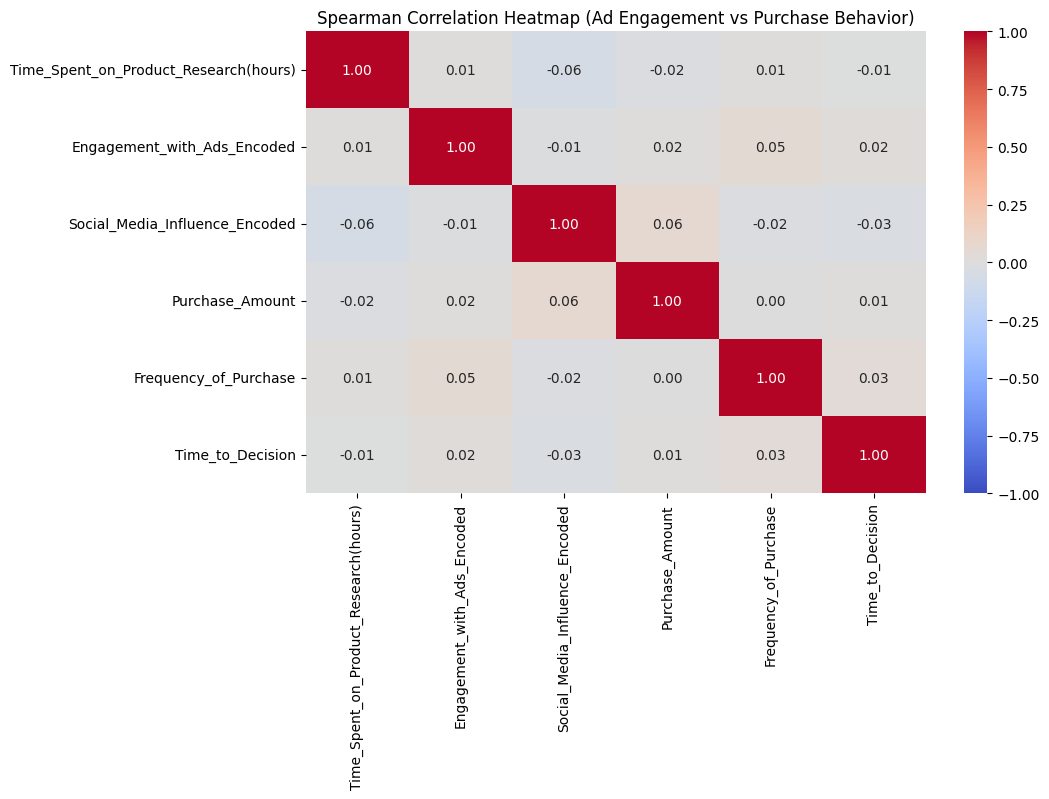

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(spearman_df, annot=True, cmap='coolwarm', center=0, fmt=".2f", vmin=-1, vmax=1)
plt.title("Spearman Correlation Heatmap (Ad Engagement vs Purchase Behavior)")
plt.show()

## Interpretation of Spearman Rank Correlation Analysis

The Spearman rank correlation heatmap displays the monotonic (not necessarily linear) relationships between the ranked values of the selected numerical features. In situations where relationships are not strictly linear or when variables have skewed distributions, the Spearman rank corrleation can be more meaningful.

### Insights
*   **Engagement with Ads (Encoded) and Purchase Behavior**
    *   `Engagement_with_Ads_Encoded` shows extremely weak positive monotonic correlations with `Purchase_Amount` (0.02), `Time_to_Decision` (0.02), and `Frequency_of_Purchase` (0.05).
    *   These values mirror the Pearson coefficients, suggesting that no stronger monotonic (nonlinear) patterns exist between ad engagement and purchase metrics.
*   **Social Media Influence (Encoded) and Purchase Behavior**
    *   `Social_Media_Influence_Encoded` shows a weak positive monotonic correlation with `Purchase_Amount` (0.06).
    *   Very weak negative monotonic correlations appear with `Frequency_of_Purchase` (–0.02) and `Time_to_Decision` (–0.03).
    *   Since all values are extremely close to zero, this indicates an absence of meaningful monotonic trends.
*   **Time Spent on Product_Research and Purchase Behavior**
    *   `Time_Spent_on_Product_Research(hours)` shows very weak monotonic correlations with `Purchase_Amount` (–0.02), `Time_to_Decision` (–0.01), and `Frequency_of_Purchase` (0.01).
    *   These coefficients indicate negligible monotonic associations.
*   **General Observations**
    *   Similar to the Pearson analysis, Spearman correlations remain near zero across all variable pairs, indicating that neither linear nor monotonic relationships exist between ad-related features and purchase behaviors in this dataset.
    *   The heatmap visually reflects this, with colors concentrated near the neutral midpoint (very light gray), indicating minimal positive or negative monotonic relationships.

# Cramer's V
Computing strength of association between pairs of nominal (categorical) variables (no encoding)
*   Categorical ad engagement columns: `Engagement_with_Ads`, `Social_Media_Influence_Encoded`, `Time_Spend_on_Product_Research(hours)`
*   Categorical purchase-related columns: `Purchase_Category`, `Purchase_Channel`, `Purchase_Method`, `Purchase_Intent`

## Correlation Matrix

In [32]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape

    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

all_cat_vars = ad_features_categorical + purchase_features_categorical

cramers_matrix = pd.DataFrame(
    np.zeros((len(all_cat_vars), len(all_cat_vars))),
    index=all_cat_vars,
    columns=all_cat_vars
)

for col1 in all_cat_vars:
    for col2 in all_cat_vars:
        cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

print("Cramer's V Matrix")
display(cramers_matrix)

Cramer's V Matrix


,Engagement_with_Ads,Social_Media_Influence,Purchase_Category,Purchase_Channel,Payment_Method,Purchase_Intent
Engagement_with_Ads,1.000000,0.000000,0.000000,0.000000,0.000000,0.042289
Social_Media_Influence,0.000000,1.000000,0.000000,0.000000,0.036335,0.012785
Purchase_Category,0.000000,0.000000,1.000000,0.042542,0.000000,0.043690
Purchase_Channel,0.000000,0.000000,0.042542,1.000000,0.039058,0.019690
Payment_Method,0.000000,0.036335,0.000000,0.039058,1.000000,0.046059
Purchase_Intent,0.042289,0.012785,0.043690,0.019690,0.046059,1.000000


## Heatmap

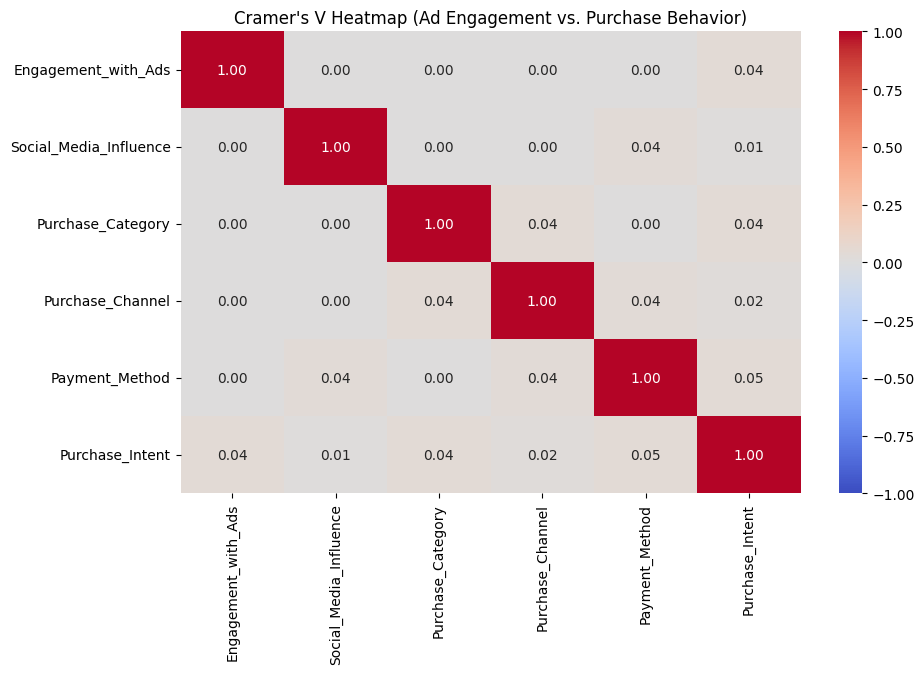

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", vmin=-1, vmax=1)
plt.title("Cramer's V Heatmap (Ad Engagement vs. Purchase Behavior)")
plt.show()

## Interpretation of Cramer's V Correlation Analysis

The results of the Cramer's V matrix measures the strength of association between pairs of nominal (categorical) variables, without requiring numerical encoding. It ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association.

### Insights
*   **Ad Engagement Other Categorical Variables**
    *   `Engagement_with_Ads` show no association with `Purchase_Category`, `Purchase_Channel`, and `Payment_Method` since these values equal 0.
    *   It shows a very weak association with `Purchase_Intent` (0.04), indicating minimal. dependence between these variables.
*   **Social Media Influence and Other Categorical Variables**
    *   `Social_Media_Influence` shows no association with `Purchase_Category` and `Purchase_Channel` because these values equal 0.
    *   It has very weak association with `Payment_Method` (0.04) and `Purchase_Intent` (0.01), however, these associations are still negligible.
*   **General Observations**
    *   The heatmap illustrates that both ad engagement and social media influence have minimal association with the examined categorical purchase behavior variables.
    *   Most Cramer's V values fall close to 0, indicating that these categorical advertising features do not show meaningful dependence with purchase-related categorical variables in this dataset.